## No mask ##

Training time: 1780.777393579483 seconds with H = 16 d= 23

3707.0626146793365 seconds training time HKRR with H = 32 d= 23

4642.449977874756 seconds training time HKRR with H = 40 d= 23

6003.049374341965 seconds training time HKRR with H = 48 d= 23


## With maks ##

5695.0701994895935 seconds for H = 32 and d = 23 with epochs 300 e mask

5623.193186998367 seconds for H = 45 and d=32 with epochs 200 (no stop loss) e mask

5676.9955179691315 seconds for H = 32, d = 23 but with H1 = 14, H2 = 14 and 4

7143.904688358307 seconds for H = 40, d = 18 with H1 = 18, H2 = 18 and 4

In [1]:
# ########################## DO NOT RUN IT UNLESS YOU DON'T HAVE THE PROCESSED FILE ############################

# def adjust_number(num):
#     """
#     Adjust the number based on the following rules:
#     - Add +2 if num >= 88
#     - Else if num >= 64, add +1
#     - Else, no change
#     """
#     if num >= 87:
#         return num + 2
#     elif num >= 64:
#         return num + 1
#     else:
#         return num

# def process_existing_dat(input_dat, output_dat):
#     """
#     Processes the existing .dat file:
#     - Adjusts the first two columns based on the specified conditions.
#     - Retains the third column as is.
#     """
#     with open(input_dat, 'r') as infile, open(output_dat, 'w') as outfile:
#         for line_num, line in enumerate(infile, start=1):
#             stripped_line = line.strip()
#             if not stripped_line:
#                 continue  # Skip empty lines
#             parts = stripped_line.split()
            
#             # Handle lines with insufficient columns
#             if len(parts) < 3:
#                 print(f"Warning: Line {line_num} does not have enough columns. Skipping.")
#                 continue
            
#             try:
#                 col1 = float(parts[0])
#                 col2 = float(parts[1])
#                 col3 = parts[2]  # Keep as string to retain original formatting
                
#                 # Adjust the first two columns
#                 adjusted_col1 = adjust_number(col1)
#                 adjusted_col2 = adjust_number(col2)
                
#                 # Format the output with two decimal places for the first two columns
#                 # and retain the third column as is
#                 outfile.write(f"{adjusted_col1:.2f} {adjusted_col2:.2f} {col3}\n")
#             except ValueError as ve:
#                 print(f"Error: Line {line_num} contains non-numeric data. Skipping. ({ve})")
#                 continue

# def append_additional_lines(output_dat, start_num, end_num, fixed_num):
#     """
#     Appends lines to the .dat file where:
#     - The first column is fixed_num
#     - The second column ranges from start_num to end_num (inclusive)
#     - The third column is 100
#     """
#     with open(output_dat, 'a') as outfile:
#         for second_col in range(start_num, end_num + 1):
#             # Format the numbers to two decimal places
#             line = f"{fixed_num:.2f} {second_col:.2f} 100\n"
#             outfile.write(line)


# # structfile 
# input_dat = '/home/ale_durso/Documents/EPFL/MA5/master_project/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old.dat'
# output_dat = '/home/ale_durso/Documents/EPFL/MA5/master_project/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

# # Step 1: Process the existing .dat file
# process_existing_dat(input_dat, output_dat)

# # Step 2: Append additional lines
# # Add lines for fixed_num = 64.00
# append_additional_lines(output_dat, 65, 176, 64.00)

# # Add lines for fixed_num = 88.00
# append_additional_lines(output_dat, 89, 176, 88.00)

# print(f"Transformation complete. Output saved to {output_dat}")

In [ ]:
import os
import torch

import numpy as np

from CODE.AttentionDCA_python.src.plot_functions import graphAtt,graphAtt_interaction, graphPPV, contact_plot_from_map, contact_plot

cwd = os.getcwd()
print(cwd)

# filename = cwd + '/CODE/DataAttentionDCA/hsp70/hsp70_train_new.fasta'
# structfile = cwd + '/CODE/DataAttentionDCA/hsp70/hsp70.dat'
# dist_map_file=cwd+'/CODE/DataAttentionDCA/hsp70/hsp70.map'

filename = cwd + '/CODE/DataAttentionDCA/HK-RR/HK-RR_174_train.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/HK-RR/HK-RR_old_preprocessed.dat'
dist_map_file = cwd + '/CODE/DataAttentionDCA/HK-RR/HK-RR_old_preprocessed.map'

/home/lisa/Documents/Attention-DCA


In [37]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor

H = 150
d = 23
loss_type = 'without_J'
family = 'HK-RR_test_interaction'

epochs = 300

K = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

print("K Tensor Dimensions:", K.shape)
print("Q Tensor Dimensions:", Q.shape)
print("V Tensor Dimensions:", V.shape)
L_B = K.shape[-1]
L_A = Q.shape[-1]
L = L_A + L_B

K Tensor Dimensions: torch.Size([150, 23, 111])
Q Tensor Dimensions: torch.Size([150, 23, 63])
V Tensor Dimensions: torch.Size([150, 21, 21])


In [38]:
K_padded= torch.zeros((H,d,L))
Q_padded= torch.zeros((H,d,L))
K_padded[:,:,L_A:] = K
Q_padded[:,:,:L_A] = Q
K=K_padded
Q=Q_padded

174


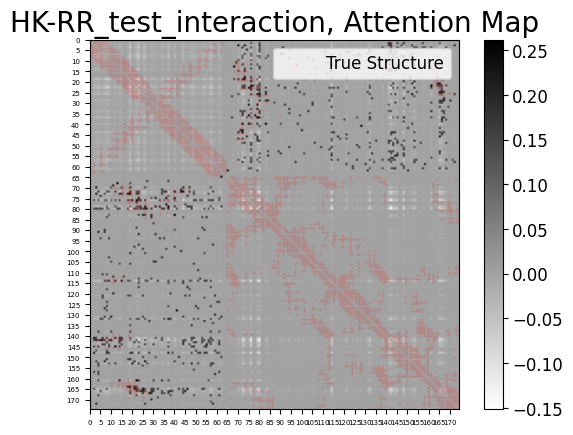

In [39]:
N =Q.shape[-1]
print(N)
# Define other parameters
PFname = family

ticks = np.arange(0, L, 5)  # Example tick positions

k=10

# Call graphAtt function
graphAtt(Q, K, V, structfile, PFname, ticks, k=k, version='mean', sqr=False, APC=True, all = False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


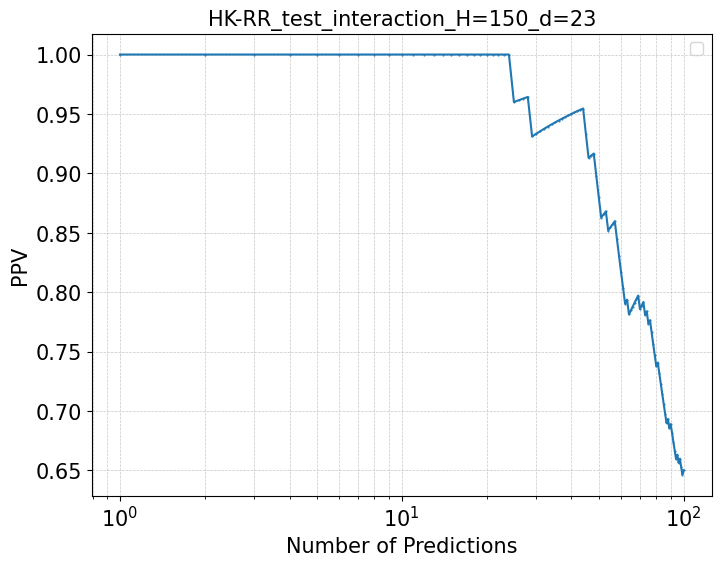

In [40]:
from CODE.AttentionDCA_python.src.dcascore import score, compute_PPV_from_map

ranking, _ = score(Q, K, V)
PPVs = [compute_PPV_from_map(ranking, dist_map_file, min_separation=5, cutoff= 10)] 
labels = ["AttentionDCA"]
figtitle = "{family}_H={H}_d={d}".format(family=family, H=H, d=d)
graphPPV(PPVs, labels, figtitle, fig_size=(8, 6), colors=["b"], fs=15)

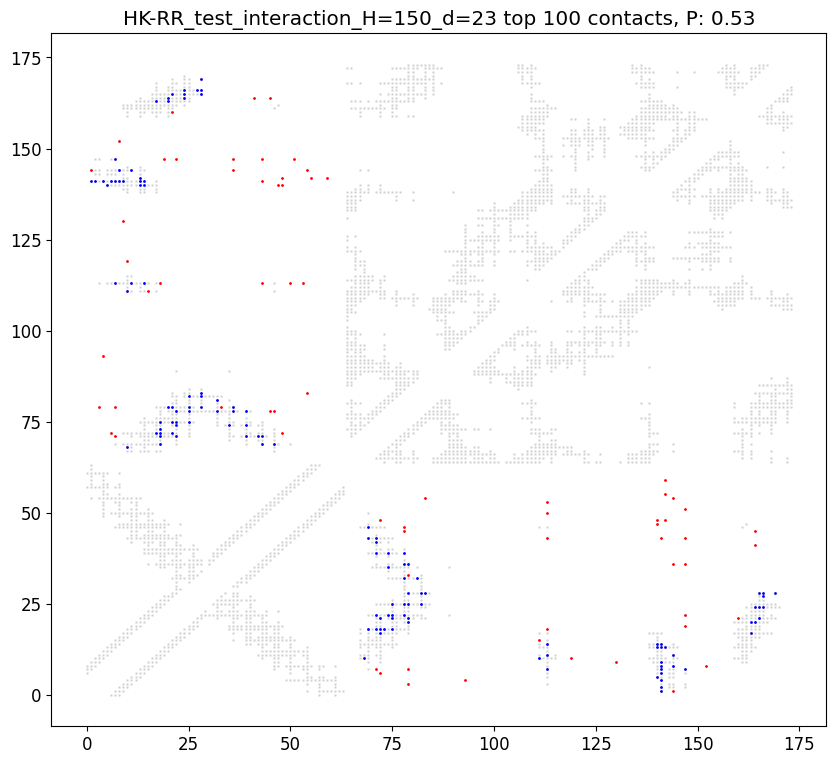

In [41]:
N = 100  # Number of top predictions to consider
figurename = figtitle

# Call the contact_plot function
contact_plot_from_map(ranking, dist_map_file, N, figurename, min_separation=5, cutoff=10)

Sorted Matched Data:
(150, 170, 10.34073576758567)
(147, 167, 10.068344119928346)
(97, 119, 8.331026119096212)
(28, 42, 6.862368803498166)
(155, 176, 6.6721334671792345)
(21, 49, 6.487840478962922)
(21, 46, 6.139684825539024)
(127, 152, 3.2503679255456044)
(21, 42, 2.9640060566017463)
(118, 165, 2.932971285737264)
(140, 153, 2.906217259922178)
(155, 169, 2.829941314826406)
(5, 15, 2.660112009669039)
(15, 56, 2.6426117782786527)
(46, 167, 2.6065255384703443)
(154, 174, 2.430969984674186)
(25, 42, 2.428734599391065)
(26, 56, 2.3973643287340805)
(153, 174, 2.268295944452298)
(65, 110, 2.2503840202764276)
(12, 77, 2.2154135533359804)
(60, 145, 2.1312360306845655)
(150, 163, 2.082405002155036)
(1, 64, 2.075212393787803)
(147, 169, 2.0459022851858655)
(153, 159, 1.8575173573691208)
(3, 159, 1.8344872290577494)
(28, 39, 1.7869380740532115)
(88, 165, 1.6952717021918633)
(8, 154, 1.688735993584087)
(12, 58, 1.6772300655461443)
(14, 53, 1.6720125010768376)
(22, 71, 1.6718278522278567)
(141, 153, 1.5735294584827515)
(44, 56, 1.5333025242725755)
(1, 70, 1.4901853348798328)
(150, 160, 1.4141151487670292)
(16, 118, 1.4132735005924968)
(56, 146, 1.358979619849416)
(12, 142, 1.332928038550023)
(153, 160, 1.3184282670664296)
(64, 176, 1.2714541899593075)
(108, 133, 1.1761155315638978)
(74, 160, 1.1596543065057343)
(22, 45, 1.15476176063996)
(10, 56, 1.1530384581331794)


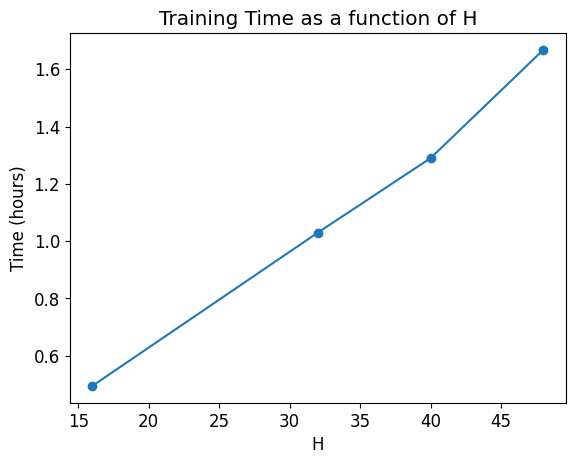

In [7]:
#plot time as a function of H
import matplotlib.pyplot as plt
import numpy as np

H = [16, 32, 40, 48]
times = [1780.777393579483, 3707.0626146793365, 4642.449977874756, 6003.049374341965] #seconds
#transform in hours and minutes
times = [t/3600 for t in times]

plt.plot(H, times, 'o-')
plt.xlabel('H')
plt.ylabel('Time (hours)')
plt.title('Training Time as a function of H')
plt.show()




## Brief compression factor analysis ##

In [38]:
#compression factor
H, d, L = Q.shape
N = L
H, q, q = V.shape
H=32
d=23
L=174
cr = (2*H*d*L+ H*q**2)/(L*(L-1)*q**2 *.5 + L*q)
cr


0.03726631718518128

In [9]:
#provaimo compression ratio so that it is 0.15
cr = 0.015
d = (cr*L*(L-1)*q**2 *.5 + L*q - H*q**2)/(2*H*L)


In [ ]:
# Match and filter `ranking32_23` based on entries in `fake32_23`
matched_data = [entry for entry in ranking32_23 if (entry[0], entry[1]) in fake32_23]

# Sort the matched data by the third element in descending order
sorted_matched_data32_23 = sorted(matched_data, key=lambda x: x[2], reverse=True)

# Print the sorted results
print("Sorted Matched Data:")
for item in sorted_matched_data32_23:
    print(item)

## Identifying False Positive ##

In [ ]:
C150_170_ai_aj = []
for i in range(len(JT_np_32_23)):
    row = []
    for j in range(len(JT_np_32_23[0])):        
            row.append(JT_np_32_23[i][j][150][170].item()**2)
    C150_170_ai_aj.append(np.array(row))

prova = np.array([np.array(xi) for xi in C150_170_ai_aj]) #yes

In [ ]:
import matplotlib.pyplot as plt

#heatmap of C150_170_ai_aj
plt.imshow(prova)

In [ ]:
tensor= torch.from_numpy(prova)
C_flat = tensor.flatten()
indices = torch.argsort(C_flat, descending=True)

# Map indices back to amino acid pairs
top_n = 10  # Number of top pairs to examine
q = 22
top_pairs = []
for idx in indices[:top_n]:
    a_i = idx // q
    a_j = idx % q
    contribution = tensor[a_i, a_j].item()
    top_pairs.append((a_i, a_j, contribution))

top_pairs


#SAME THING AS ABOVE

import numpy as np

# Number of highest terms to find
top_n = 5

# Flatten the structure and track original indices
flattened = np.concatenate(C150_170_ai_aj)
original_indices = []
for i, array in enumerate(C150_170_ai_aj):
    original_indices.extend([(i, j) for j in range(len(array))])

# Find the indices of the largest absolute values
flat_indices = np.argpartition(np.abs(flattened), -top_n)[-top_n:]
sorted_indices = flat_indices[np.argsort(-np.abs(flattened[flat_indices]))]

# Map back to the original indices
top_contributions = [(original_indices[idx][0], original_indices[idx][1], flattened[idx]) for idx in sorted_indices]

# Display the results
print("Top contributions:")
for array_idx, element_idx, value in top_contributions:
    print(f"Array {array_idx}, Index {element_idx}: Value {value:.6f}")


In [ ]:
top_pairs

In [ ]:
from Bio import SeqIO

# Path to your FASTA file
fasta_file = filename

# Amino acids of interest at positions 150 and 170
target_amino_acids = [(150, 'C'), (170, 'Q')]  # Example: 'A' at position 150, 'G' at position 170
# Parse the FASTA file and filter sequences
filtered_sequences = []
removed_sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    sequence = str(record.seq)
    match = all(sequence[pos - 1] == amino for pos, amino in target_amino_acids)  # 1-based index in FASTA
    if match:
        removed_sequences.append(record)
    else:
        filtered_sequences.append(record)

# Save filtered sequences to a new FASTA file
output_file_filtered = "filtered_sequences.fasta"
output_file_removed = "removed_sequences.fasta"

SeqIO.write(filtered_sequences, output_file_filtered, "fasta")
SeqIO.write(removed_sequences, output_file_removed, "fasta")

print(f"Filtered sequences saved to {output_file_filtered}")
print(f"Removed sequences saved to {output_file_removed}")

In [ ]:
import numpy as np
import torch
from Bio import SeqIO
import matplotlib.pyplot as plt

letter_to_num = {
    'A': 1,  'B': 21, 'C': 2,  'D': 3,  'E': 4,
    'F': 5,  'G': 6,  'H': 7,  'I': 8,  'J': 21,
    'K': 9,  'L': 10, 'M': 11, 'N': 12, 'O': 21,
    'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17,
    'U': 21, 'V': 18, 'W': 19, 'X': 21, 'Y': 20,
    '-': 21  # Gap symbol
}

# Inverse mapping
num_to_letter = {v: k for k, v in letter_to_num.items() if v != 21}

# Parameters
top_k_contacts = 1
top_m_contributions = 1
filename = filename  # Replace with your actual FASTA file path

# Extract matched and sorted data
matched_data = [entry for entry in ranking32_23 if (entry[0], entry[1]) in fake32_23]
sorted_matched_data32_23 = sorted(matched_data, key=lambda x: x[2], reverse=True)

# Select top k contacts
top_false_contacts = sorted_matched_data32_23[:top_k_contacts]

L = 176


def get_top_contributing_pairs(JT_np, contact, top_m):
    pos1, pos2, _ = contact
    C_ai_aj = np.array([[JT_np[i][j][pos1-1][pos2-1]**2 for j in range(22)] for i in range(22)]) #TO SEE THIS POS +-1
    tensor = torch.from_numpy(C_ai_aj)
    C_flat = tensor.flatten()
    indices = torch.argsort(C_flat, descending=True)
    
    top_pairs = []
    for idx in indices[:top_m]:
        a_i = idx // 22
        a_j = idx % 22
        contribution = tensor[a_i, a_j].item()
        top_pairs.append((a_i, a_j, contribution))
    
    return top_pairs

# Aggregate constraints
constrained_positions = {}

for contact in top_false_contacts:
    top_pairs = get_top_contributing_pairs(JT_np_32_23, contact, top_m_contributions)
    pos1, pos2, _ = contact
    for a_i, a_j, contrib in top_pairs:
        aa_i = num_to_letter.get(a_i.item() + 1, None)  # Adjust indexing if necessary
        aa_j = num_to_letter.get(a_j.item() + 1, None)
        if aa_i:
            constrained_positions.setdefault(pos1-1, set()).add(aa_i) #TO SEE THIS POS +-1
        if aa_j:
            constrained_positions.setdefault(pos2-1, set()).add(aa_j) #TO SEE THIS POS +-1

print("Constrained Positions and Amino Acids:")
for pos, aas in constrained_positions.items():
    print(f"Position {pos}: {', '.join(aas)}")

def filter_sequences(fasta_file, constrained_positions, output_filtered, output_removed):
    filtered_sequences = []
    removed_sequences = []
    
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence = str(record.seq)
        remove = False
        for pos, aas in constrained_positions.items():
            if pos - 1 < len(sequence):
                if sequence[pos] in aas:
                    remove = True
                    break
        if remove:
            removed_sequences.append(record)
        else:
            filtered_sequences.append(record)
    
    SeqIO.write(filtered_sequences, output_filtered, "fasta")
    SeqIO.write(removed_sequences, output_removed, "fasta")
    
    print(f"Filtered sequences saved to {output_filtered}")
    print(f"Removed sequences saved to {output_removed}")

# Define output files
output_file_filtered = "filtered_sequences2.fasta"
output_file_removed = "removed_sequences2.fasta"

# Perform filtering
filter_sequences(filename, constrained_positions, output_file_filtered, output_file_removed)